# Predict Bike Sharing Demand with AutoGluon

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook <need to write>.

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key

## Step 2: Download the Kaggle dataset using the kaggle python library

### Install packages

In [3]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

  Using cached pip-22.0.2-py3-none-any.whl (2.1 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.3.1
    Uninstalling pip-21.3.1:
      Successfully uninstalled pip-21.3.1
  Using cached setuptools-60.7.0-py3-none-any.whl (1.0 MB)
  Using cached wheel-0.37.1-py2.py3-none-any.whl (35 kB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 59.4.0
    Uninstalling setuptools-59.4.0:
      Successfully uninstalled setuptools-59.4.0
  Using cached mxnet-1.9.0-py3-none-manylinux2014_x86_64.whl (47.3 MB)
  Using cached bokeh-2.0.1-py3-none-any.whl
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.2
    Uninstalling bokeh-2.4.2:
      Successfully uninstalled bokeh-2.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.7/273.7 KB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 KB 156.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.9/52.9 KB 155.7 MB/s eta 0:00:00
     ━━━━━━━

### Setup Kaggle API Key

In [4]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "username"
kaggle_key = "key"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

In [5]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [6]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [7]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [9]:
# Same thing as train and test dataset
submission = pd.read_csv("sampleSubmission.csv")
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are predicting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [ ]:
predictor = TabularPredictor(label="count",eval_metric="root_mean_squared_error").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])], time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220202_190705/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220202_190705/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 9
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2932.42 MB
	Train Data (Original)  Memory Usage: 1.52 MB (0.1% of available memory)
	Inferring data type of each feature based on column va

[1000]	train_set's rmse: 123.806	valid_set's rmse: 134.369
[2000]	train_set's rmse: 117.412	valid_set's rmse: 133.705


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 123.42	valid_set's rmse: 141.5


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 125.097	valid_set's rmse: 128.797
[2000]	train_set's rmse: 119.003	valid_set's rmse: 127.909
[3000]	train_set's rmse: 114.63	valid_set's rmse: 127.431
[4000]	train_set's rmse: 111.295	valid_set's rmse: 126.943
[5000]	train_set's rmse: 108.576	valid_set's rmse: 126.844
[6000]	train_set's rmse: 106.085	valid_set's rmse: 126.71


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.131	valid_set's rmse: 138.303
[2000]	train_set's rmse: 117.833	valid_set's rmse: 137.535


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.871	valid_set's rmse: 128.052
[2000]	train_set's rmse: 118.547	valid_set's rmse: 127.003
[3000]	train_set's rmse: 114.124	valid_set's rmse: 126.834
[4000]	train_set's rmse: 110.645	valid_set's rmse: 126.694


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.654	valid_set's rmse: 135.095
[2000]	train_set's rmse: 118.764	valid_set's rmse: 133.849
[3000]	train_set's rmse: 114.615	valid_set's rmse: 133.509
[4000]	train_set's rmse: 111.249	valid_set's rmse: 133.472
[5000]	train_set's rmse: 108.455	valid_set's rmse: 133.281


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.01	valid_set's rmse: 139.355
[2000]	train_set's rmse: 117.819	valid_set's rmse: 138.312
[3000]	train_set's rmse: 113.4	valid_set's rmse: 137.886
[4000]	train_set's rmse: 110.032	valid_set's rmse: 137.758


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.47	valid_set's rmse: 135.412


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.18	valid_set's rmse: 137.579
[2000]	train_set's rmse: 117.782	valid_set's rmse: 136.664
[3000]	train_set's rmse: 113.447	valid_set's rmse: 136.246
[4000]	train_set's rmse: 109.982	valid_set's rmse: 136.227


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 124.641	valid_set's rmse: 132.484


	-134.0883	 = Validation score   (root_mean_squared_error)
	43.52s	 = Training   runtime
	2.27s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 347.21s of the 547.26s of remaining time.
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' arg

[1000]	train_set's rmse: 96.0217	valid_set's rmse: 123.249


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 94.7479	valid_set's rmse: 135.635


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.3055	valid_set's rmse: 132.087


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 95.1635	valid_set's rmse: 131.521


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-132.2864	 = Validation score   (root_mean_squared_error)
	12.45s	 = Training   runtime
	0.44s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 332.2s of the 532.26s of remaining time.
	-118.4567	 = Validation score   (root_mean_squared_error)
	6.95s	 = Training   runtime


### Review AutoGluon's training run with ranking of models that did the best.

In [13]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3 -115.137560       6.742346  496.261137                0.000706           0.359653            3       True         19
1   NeuralNetFastAI_BAG_L2 -115.744948       6.032625  473.175181                0.320724         102.300158            2       True         17
2        LightGBMXT_BAG_L2 -116.493262       5.887283  379.993131                0.175382           9.118108            2       True         12
3          CatBoost_BAG_L2 -116.626608       5.746478  398.328017                0.034578          27.452993            2       True         15
4          LightGBM_BAG_L2 -117.033443       5.790961  378.243744                0.079061           7.368721            2       True         13
5           XGBoost_BAG_L2 -117.568875       5.795717  382.276823         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L2': 'StackerEnsembleModel_XGB

### Create predictions from test dataset

In [18]:
predictions = predictor.predict(test)
predictions.head()

0     97.187813
1     93.852036
2     93.853455
3    106.684494
4    106.629463
Name: count, dtype: float32

In [ ]:
predictor.leaderboard(test)

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [19]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      210.817230
std       126.929222
min         1.851743
25%       106.759476
50%       195.041473
75%       296.283264
max       646.277466
Name: count, dtype: float64

In [20]:
# How many negative values do we have?
count=0
for pred in predictions:
    if pred < 0:
        count=count+1
count

0

In [ ]:
# Set them to zero
# Not required since there are no negative values

### Set predictions to submission dataframe, save, and submit

In [23]:
print(predictions)

0        97.187813
1        93.852036
2        93.853455
3       106.684494
4       106.629463
           ...    
6488    309.439667
6489    309.443054
6490    315.254974
6491    287.648743
6492    338.066895
Name: count, Length: 6493, dtype: float32


In [24]:
predictions.values

array([ 97.18781 ,  93.852036,  93.853455, ..., 315.25497 , 287.64874 ,
       338.0669  ], dtype=float32)

In [25]:
submission["count"] = predictions.values
submission.to_csv("submission.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 345kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [29]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission.csv               2022-02-02 19:29:26  first raw submission                    complete  1.39487      1.39487       


#### Initial score of `1.39487`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<AxesSubplot:title={'center':'season'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>],
       [<AxesSubplot:title={'center':'weather'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'atemp'}>],
       [<AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>, <AxesSubplot:>]],
      dtype=object)

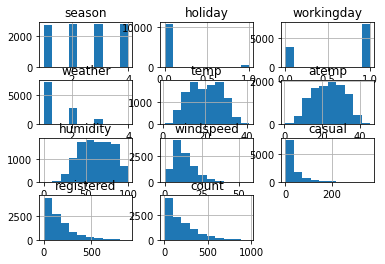

In [30]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist()

In [31]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [32]:
# column structure in train dataset BEFORE new feature creation
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [10]:
# change datatype of datetime column to DateTime
train.loc[:, "datetime"] = pd.to_datetime(train.loc[:, "datetime"])

In [11]:
# create a new feature

train["hour"] = train.datetime.dt.hour
train["month"] = train.datetime.dt.month
train["day"] = train.datetime.dt.day


In [12]:
# column structure in train dataset AFTER new feature creation
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


In [36]:
# column structure in test dataset BEFORE new feature creation

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [13]:
# change datatype of datetime column to DateTime
test.loc[:, "datetime"] = pd.to_datetime(test.loc[:, "datetime"])

In [14]:
# create a new feature
test["hour"] = test.datetime.dt.hour
test["month"] = test.datetime.dt.month
test["day"] = test.datetime.dt.day

In [15]:
# column structure in test dataset AFTER new feature creation
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,month,day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0,1,20
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,1,20
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2,1,20
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3,1,20
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4,1,20


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [16]:
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")
test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [42]:
# View new features
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1


array([[<AxesSubplot:title={'center':'datetime'}>,
        <AxesSubplot:title={'center':'holiday'}>,
        <AxesSubplot:title={'center':'workingday'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'atemp'}>,
        <AxesSubplot:title={'center':'humidity'}>,
        <AxesSubplot:title={'center':'windspeed'}>,
        <AxesSubplot:title={'center':'casual'}>],
       [<AxesSubplot:title={'center':'registered'}>,
        <AxesSubplot:title={'center':'count'}>,
        <AxesSubplot:title={'center':'hour'}>,
        <AxesSubplot:title={'center':'month'}>],
       [<AxesSubplot:title={'center':'day'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

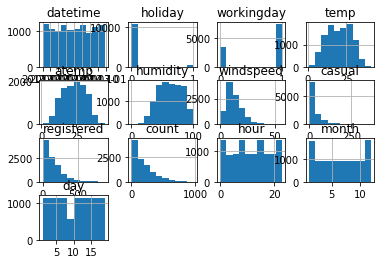

In [43]:
# View histogram of all features again now with the hour feature
train.hist()

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  category      
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  category      
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
 12  hour        10886 non-null  int64         
 13  month       10886 non-null  int64         
 14  day         10886 non-null  int64         
dtypes: category(2), datetime64[ns](1), float64(3), int64(9)
memory usage: 

In [45]:
train.describe()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day
count,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,0.028569,0.680875,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132,11.541613,6.521495,9.992559
std,0.166599,0.466159,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454,6.915838,3.444373,5.476608
min,0.000000,0.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000,6.000000,4.000000,5.000000
50%,0.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000,12.000000,7.000000,10.000000
75%,0.000000,1.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000,18.000000,10.000000,15.000000
max,1.000000,1.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,12.000000,19.000000


## Step 5: Rerun the model with the same settings as before, just with more features

In [46]:
predictor_new_features = TabularPredictor(label="count",eval_metric="root_mean_squared_error").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])], time_limit=600, presets="best_quality")

No path specified. Models will be saved in: "AutogluonModels/ag-20220202_193923/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220202_193923/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type argument in fit() (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2420.95 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column v

[1000]	train_set's rmse: 30.7376	valid_set's rmse: 37.6853
[2000]	train_set's rmse: 25.8887	valid_set's rmse: 36.3085
[3000]	train_set's rmse: 23.1491	valid_set's rmse: 35.8944
[4000]	train_set's rmse: 21.181	valid_set's rmse: 35.803
[5000]	train_set's rmse: 19.6612	valid_set's rmse: 35.7654


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.5414	valid_set's rmse: 41.34
[2000]	train_set's rmse: 25.6339	valid_set's rmse: 39.3073
[3000]	train_set's rmse: 22.9703	valid_set's rmse: 38.68
[4000]	train_set's rmse: 21.0487	valid_set's rmse: 38.3491
[5000]	train_set's rmse: 19.568	valid_set's rmse: 38.121
[6000]	train_set's rmse: 18.3684	valid_set's rmse: 37.9466
[7000]	train_set's rmse: 17.347	valid_set's rmse: 37.8924
[8000]	train_set's rmse: 16.421	valid_set's rmse: 37.7667
[9000]	train_set's rmse: 15.6093	valid_set's rmse: 37.7304
[10000]	train_set's rmse: 14.8919	valid_set's rmse: 37.7428


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.0461	valid_set's rmse: 35.2105
[2000]	train_set's rmse: 26.0047	valid_set's rmse: 34.0067
[3000]	train_set's rmse: 23.2324	valid_set's rmse: 33.8698


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.4064	valid_set's rmse: 41.6394
[2000]	train_set's rmse: 25.567	valid_set's rmse: 39.8941
[3000]	train_set's rmse: 22.9126	valid_set's rmse: 39.3073
[4000]	train_set's rmse: 21.1144	valid_set's rmse: 38.9247
[5000]	train_set's rmse: 19.6681	valid_set's rmse: 38.6946
[6000]	train_set's rmse: 18.4567	valid_set's rmse: 38.4382
[7000]	train_set's rmse: 17.4453	valid_set's rmse: 38.3083
[8000]	train_set's rmse: 16.5522	valid_set's rmse: 38.2049
[9000]	train_set's rmse: 15.7557	valid_set's rmse: 38.1466
[10000]	train_set's rmse: 15.0209	valid_set's rmse: 38.0793


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.7476	valid_set's rmse: 38.5074
[2000]	train_set's rmse: 25.8946	valid_set's rmse: 37.4207
[3000]	train_set's rmse: 23.1842	valid_set's rmse: 37.1689
[4000]	train_set's rmse: 21.2301	valid_set's rmse: 37.1645


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.6149	valid_set's rmse: 41.3972
[2000]	train_set's rmse: 25.6795	valid_set's rmse: 40.275
[3000]	train_set's rmse: 23.0019	valid_set's rmse: 40.0223
[4000]	train_set's rmse: 21.0692	valid_set's rmse: 40.0055


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.9698	valid_set's rmse: 38.7415
[2000]	train_set's rmse: 25.9996	valid_set's rmse: 35.9834
[3000]	train_set's rmse: 23.2962	valid_set's rmse: 35.043
[4000]	train_set's rmse: 21.3837	valid_set's rmse: 34.7768
[5000]	train_set's rmse: 19.8462	valid_set's rmse: 34.556
[6000]	train_set's rmse: 18.5425	valid_set's rmse: 34.5105
[7000]	train_set's rmse: 17.4699	valid_set's rmse: 34.452
[8000]	train_set's rmse: 16.5448	valid_set's rmse: 34.5286


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8158	valid_set's rmse: 40.0477
[2000]	train_set's rmse: 25.8511	valid_set's rmse: 38.4189
[3000]	train_set's rmse: 23.1096	valid_set's rmse: 37.9895
[4000]	train_set's rmse: 21.1965	valid_set's rmse: 37.8563
[5000]	train_set's rmse: 19.6606	valid_set's rmse: 37.7866
[6000]	train_set's rmse: 18.4473	valid_set's rmse: 37.6621
[7000]	train_set's rmse: 17.3839	valid_set's rmse: 37.6104
[8000]	train_set's rmse: 16.4545	valid_set's rmse: 37.5852
[9000]	train_set's rmse: 15.6263	valid_set's rmse: 37.5827
[10000]	train_set's rmse: 14.8962	valid_set's rmse: 37.5647


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 30.8715	valid_set's rmse: 41.6983
[2000]	train_set's rmse: 25.7864	valid_set's rmse: 40.4701
[3000]	train_set's rmse: 23.0438	valid_set's rmse: 40.2124
[4000]	train_set's rmse: 21.1102	valid_set's rmse: 40.1203


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 31.2128	valid_set's rmse: 37.7181
[2000]	train_set's rmse: 26.193	valid_set's rmse: 35.5644
[3000]	train_set's rmse: 23.4812	valid_set's rmse: 34.97
[4000]	train_set's rmse: 21.5353	valid_set's rmse: 34.57
[5000]	train_set's rmse: 20.0592	valid_set's rmse: 34.4469
[6000]	train_set's rmse: 18.7743	valid_set's rmse: 34.367
[7000]	train_set's rmse: 17.7047	valid_set's rmse: 34.3081
[8000]	train_set's rmse: 16.7867	valid_set's rmse: 34.3073


	-36.9415	 = Validation score   (root_mean_squared_error)
	97.25s	 = Training   runtime
	5.49s	 = Validation runtime
Fitting model: LightGBM_BAG_L1 ... Training model for up to 283.6s of the 483.58s of remaining time.
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.1363	valid_set's rmse: 35.5572
[2000]	train_set's rmse: 15.5114	valid_set's rmse: 35.4473


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.0431	valid_set's rmse: 36.9373
[2000]	train_set's rmse: 15.5393	valid_set's rmse: 36.1173
[3000]	train_set's rmse: 12.204	valid_set's rmse: 35.918
[4000]	train_set's rmse: 9.99922	valid_set's rmse: 35.8485


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4766	valid_set's rmse: 32.789


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.4591	valid_set's rmse: 38.1004
[2000]	train_set's rmse: 15.6967	valid_set's rmse: 37.1149
[3000]	train_set's rmse: 12.2044	valid_set's rmse: 36.7233
[4000]	train_set's rmse: 9.95476	valid_set's rmse: 36.6799


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3995	valid_set's rmse: 37.384


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.6619	valid_set's rmse: 35.9544


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 20.9449	valid_set's rmse: 35.7483
[2000]	train_set's rmse: 15.4023	valid_set's rmse: 35.1407


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 21.3287	valid_set's rmse: 36.3231
[2000]	train_set's rmse: 15.6319	valid_set's rmse: 35.6071


	-36.5792	 = Validation score   (root_mean_squared_error)
	30.24s	 = Training   runtime
	1.23s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1 ... Training model for up to 248.03s of the 448.01s of remaining time.
	-41.3075	 = Validation score   (root_mean_squared_error)
	9.54s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: CatBoost_BAG_L1 ... Training model for up to 235.97s of the 435.95s of remaining time.
	Time limit exceeded... Skipping CatBoost_BAG_L1.
Fitting model: ExtraTreesMSE_BAG_L1 ... Training model for up to 206.21s of the 406.19s of remaining time.
	-40.8242	 = Validation score   (root_mean_squared_error)
	3.93s	 = Training   runtime
	0.4s	 = Validation runtime
Fitting model: NeuralNetFastAI_BAG_L1 ... Training model for up to 199.47s of the 399.45s of remaining time.
	-46.4964	 = Validation score   (root_mean_squared_error)
	133.28s	 = Training   runtime
	0.35s	 = Validation runtime
Fitting model: XGBoost_BAG_L1 ... Training model for up to

In [47]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2  -35.186484       7.796752  302.526579                0.000757           0.457028            2       True         10
1      WeightedEnsemble_L3  -35.245798      12.343088  510.300913                0.000722           0.320552            3       True         17
2          CatBoost_BAG_L2  -35.577795      10.931376  372.807618                0.064953          42.170421            2       True         14
3     ExtraTreesMSE_BAG_L2  -35.695318      11.330737  337.485581                0.464314           6.848383            2       True         15
4          LightGBM_BAG_L2  -35.763061      10.963635  337.815503                0.097212           7.178305            2       True         12
5   NeuralNetFastAI_BAG_L2  -35.977238      11.253547  425.997911         

{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'XGBoost_BAG_L1': 'StackerEnsembleModel_XGBoost',
  'NeuralNetMXNet_BAG_L1': 'StackerEnsembleModel_TabularNeuralNet',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': 

In [48]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test)

In [49]:
# How many negative values do we have after removal?
counter=0
for pred in predictions_new_features:
    if pred < 0:
        counter=counter+1
counter

107

In [50]:
# Set them to zero
for index in predictions_new_features.keys():
    if predictions_new_features[index] < 0:
        predictions_new_features[index]=0

In [51]:
# How many negative values do we have after removal?
counter=0
for pred in predictions_new_features:
    if pred < 0:
        counter=counter+1
counter

0

In [52]:
# Initialize values
submission_new_features = pd.read_csv("sampleSubmission.csv")
submission_new_features.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [53]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features.values
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [54]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 459kB/s]
Successfully submitted to Bike Sharing Demand

In [55]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 4

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2022-02-02 19:54:58  new features                            complete  0.55149      0.55149       
submission.csv               2022-02-02 19:29:26  first raw submission                    complete  1.39487      1.39487       


#### New Score of `0.55149`

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [56]:
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy
}
predictor_new_hpo = TabularPredictor(label="count",eval_metric="root_mean_squared_error",problem_type="regression").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])], time_limit=600, presets="best_quality",hyperparameter_tune_kwargs=hyperparameter_tune_kwargs)

No path specified. Models will be saved in: "AutogluonModels/ag-20220202_195656/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20220202_195656/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2269.53 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting Cate

[1000]	train_set's rmse: 8.84519	valid_set's rmse: 36.334
[2000]	train_set's rmse: 4.14753	valid_set's rmse: 36.122
[3000]	train_set's rmse: 2.20644	valid_set's rmse: 36.0657
[4000]	train_set's rmse: 1.26036	valid_set's rmse: 36.0607


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.0955	valid_set's rmse: 33.0768


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 8.80966	valid_set's rmse: 36.8276
[2000]	train_set's rmse: 4.28416	valid_set's rmse: 36.6523


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 8.90564	valid_set's rmse: 36.7088


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a f

[1000]	train_set's rmse: 8.82007	valid_set's rmse: 34.5278


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 9.09881	valid_set's rmse: 36.8336
[2000]	train_set's rmse: 4.36071	valid_set's rmse: 36.4808
[3000]	train_set's rmse: 2.40468	valid_set's rmse: 36.4265


	-36.2112	 = Validation score   (root_mean_squared_error)
	65.47s	 = Training   runtime
	1.38s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 371.3s of remaining time.
	-36.0912	 = Validation score   (root_mean_squared_error)
	0.32s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models ...
Hyperparameter tuning model: LightGBMXT_BAG_L2 ...
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/tqdm/notebook.py", line 103, in status_printer
    pbar = IntProgress(min=0, max=total)
NameError: name 'IntProgress' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 1153, in _train_single_full
    hpo_models, hpo_model_performances, hpo_results = model.hyperparameter_tune(X=X, y=y, k_fold=k_

In [57]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2  -36.091199       2.129336  191.550136                0.000601           0.317499            2       True          7
1        LightGBMLarge_BAG_L1  -36.211158       1.381140   65.467891                1.381140          65.467891            1       True          6
2         WeightedEnsemble_L3  -36.238301       3.926142  347.788011                0.000679           0.226422            3       True         12
3     ExtraTreesMSE_BAG_L2/T0  -36.594864       3.407551  206.862270                0.452794           6.036594            2       True          9
4   NeuralNetFastAI_BAG_L2/T0  -36.772529       3.331507  324.408333                0.376751         123.582657            2       True         10
5        LightGBMLarge_BAG_L2  -37.285577       3.095918

{'model_types': {'KNeighborsUnif_BAG_L1/T0': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1/T0': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1/T0': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1/T0': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1/T0': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2/T0': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2/T0': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2/T0': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1/T0': -123.92263994015985,
  'KNeighborsDist_BAG_L1/T0': -119.37339448003198,
  'RandomForestMSE_BAG_L1/T0': -41.30754583307658,
  'ExtraTreesMSE_BAG_L1/T0': -40.82419267315799,
  'NeuralNetFastAI_BAG_L1/T0': -59.600839937880465,
  'LightGBMLarg

In [58]:
predictions_new_hpo = predictor_new_hpo.predict(test)

In [59]:
# Remember to set all negative values to zero
# How many negative values do we have after removal?
counter=0
for pred in predictions_new_hpo:
    if pred < 0:
        counter=counter+1
counter

41

In [60]:
# Set them to zero
for index in predictions_new_hpo.keys():
    if predictions_new_hpo[index] < 0:
        predictions_new_hpo[index]=0

In [61]:
# Initialize dataframe
submission_new_hpo = pd.read_csv("sampleSubmission.csv")
submission_new_hpo.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [62]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo.values
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [63]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 374kB/s]
Successfully submitted to Bike Sharing Demand

In [65]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 5

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2022-02-02 20:08:13  new features with hyperparameters       complete  0.49953      0.49953       
submission_new_features.csv  2022-02-02 19:54:58  new features                            complete  0.55149      0.55149       
submission.csv               2022-02-02 19:29:26  first raw submission                    complete  1.39487      1.39487       


#### New Score of `0.49953`

## Updating hyperparameters further

In [34]:
num_trials = 5  # try at most 5 different hyperparameter configurations for each type of model
search_strategy = 'auto'  # to tune hyperparameters using random search routine

hyperparameter_tune_kwargs = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials,
    'scheduler' : 'local',
    'searcher': search_strategy
}

In [ ]:

predictor_new_hpo_args = TabularPredictor(label="count",eval_metric="root_mean_squared_error",problem_type="regression").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])], time_limit=1000, 
                                                                                                                        presets="best_quality",
                                                                                                                        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                                                                       num_bag_folds=5, num_bag_sets=2, num_stack_levels=1)

No path specified. Models will be saved in: "AutogluonModels/ag-20220202_214942/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "AutogluonModels/ag-20220202_214942/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2401.82 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting Cat

[1000]	train_set's rmse: 7.94246	valid_set's rmse: 36.1445


	-36.0522	 = Validation score   (root_mean_squared_error)
	6.9s	 = Training   runtime
	0.27s	 = Validation runtime
Fitting model: KNeighborsUnif_BAG_L1/T0 ... Training model for up to 617.36s of the 950.71s of remaining time.
	-123.9226	 = Validation score   (root_mean_squared_error)
	0.06s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1/T0 ... Training model for up to 617.29s of the 950.64s of remaining time.
	-119.3734	 = Validation score   (root_mean_squared_error)
	0.02s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1/T0 ... Training model for up to 617.22s of the 950.57s of remaining time.
	-41.3075	 = Validation score   (root_mean_squared_error)
	9.77s	 = Training   runtime
	0.43s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1/T0 ... Training model for up to 617.16s of the 950.5s of remaining time.
	-40.8242	 = Validation score   (root_mean_squared_error)
	4.49s	 = Training   runtime
	0.41s

[1000]	train_set's rmse: 8.19209	valid_set's rmse: 35.8467


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 7.83644	valid_set's rmse: 38.136


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 8.04423	valid_set's rmse: 36.4522


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 7.95789	valid_set's rmse: 38.8895


	-37.0626	 = Validation score   (root_mean_squared_error)
	30.07s	 = Training   runtime
	1.19s	 = Validation runtime
Repeating k-fold bagging: 2/2
Fitting model: NeuralNetFastAI_BAG_L1/T0 ... Training model for up to 540.87s of the 874.21s of remaining time.
	-37.7117	 = Validation score   (root_mean_squared_error)
	59.31s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L2 ... Training model for up to 671.8s of the 671.78s of remaining time.
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'lo

In [69]:
predictor_new_hpo_args.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2  -36.263891       3.071317  179.708018                0.000681           0.305906            2       True          7
1        LightGBMLarge_BAG_L1  -36.328919       2.137563   50.975962                2.137563          50.975962            1       True          6
2         WeightedEnsemble_L3  -36.378999       5.116631  340.780307                0.000692           0.236300            3       True         12
3     ExtraTreesMSE_BAG_L2/T0  -36.663420       4.339822  195.118741                0.455063           6.033159            2       True          9
4        LightGBMLarge_BAG_L2  -37.094839       4.108869  206.117330                0.224110          17.031748            2       True         11
5   NeuralNetFastAI_BAG_L2/T0  -37.143037       4.436766

{'model_types': {'KNeighborsUnif_BAG_L1/T0': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1/T0': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1/T0': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1/T0': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1/T0': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2/T0': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2/T0': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2/T0': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1/T0': -123.92263994015985,
  'KNeighborsDist_BAG_L1/T0': -119.37339448003198,
  'RandomForestMSE_BAG_L1/T0': -41.30754583307658,
  'ExtraTreesMSE_BAG_L1/T0': -40.82419267315799,
  'NeuralNetFastAI_BAG_L1/T0': -56.12061068073881,
  'LightGBMLarge

In [70]:
predictor_new_hpo_args = predictor_new_hpo_args.predict(test)

In [72]:
# How many negative values do we have after removal?
counter=0
for pred in predictor_new_hpo_args:
    if pred < 0:
        counter=counter+1
counter

39

In [74]:
# Set them to zero
for index in predictor_new_hpo_args.keys():
    if predictor_new_hpo_args[index] < 0:
        predictor_new_hpo_args[index]=0

In [75]:
# Initialize dataframe
submission_new_hpo_args = pd.read_csv("sampleSubmission.csv")
submission_new_hpo_args.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [76]:
# Same submitting predictions
submission_new_hpo_args["count"] = predictor_new_hpo_args.values
submission_new_hpo_args.to_csv("submission_new_hpo_args.csv", index=False)

In [78]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_args.csv -m "new features with hyperparameters args"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 444kB/s]
Successfully submitted to Bike Sharing Demand

In [79]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                             status    publicScore  privateScore  
---------------------------  -------------------  --------------------------------------  --------  -----------  ------------  
submission_new_hpo_args.csv  2022-02-02 20:21:11  new features with hyperparameters args  complete  0.49958      0.49958       
submission_new_hpo.csv       2022-02-02 20:08:13  new features with hyperparameters       complete  0.49953      0.49953       
submission_new_features.csv  2022-02-02 19:54:58  new features                            complete  0.55149      0.55149       
submission.csv               2022-02-02 19:29:26  first raw submission                    complete  1.39487      1.39487       


#### New Score of `0.49958`

## Testing with grid search as the hyperparameter

In [ ]:
num_trials_new = 5  # try at most 5 different hyperparameter configurations for each type of model

search_strategy_new = 'grid'  # to tune hyperparameters using random search routine

hyperparameter_tune_kwargs_2 = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials_new,
    'scheduler' : 'local',
    'searcher': search_strategy_new
}
predictor_new_hpo_arg = TabularPredictor(label="count",eval_metric="root_mean_squared_error",problem_type="regression").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])], time_limit=1000, 
                                                                                                                        presets="best_quality",
                                                                                                                        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs_2,
                                                                                                                       num_bag_folds=5, num_bag_sets=2, num_stack_levels=1)

No path specified. Models will be saved in: "AutogluonModels/ag-20220202_212254/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "AutogluonModels/ag-20220202_212254/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    3007.3 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting Cate

[1000]	train_set's rmse: 7.94246	valid_set's rmse: 36.1445


	-36.0522	 = Validation score   (root_mean_squared_error)
	6.89s	 = Training   runtime
	0.3s	 = Validation runtime
Fitting model: KNeighborsUnif_BAG_L1/T0 ... Training model for up to 610.17s of the 943.48s of remaining time.
	-123.9226	 = Validation score   (root_mean_squared_error)
	0.03s	 = Training   runtime
	0.21s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1/T0 ... Training model for up to 610.09s of the 943.4s of remaining time.
	-119.3734	 = Validation score   (root_mean_squared_error)
	0.02s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1/T0 ... Training model for up to 610.0s of the 943.31s of remaining time.
	-41.3075	 = Validation score   (root_mean_squared_error)
	11.8s	 = Training   runtime
	0.42s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1/T0 ... Training model for up to 609.92s of the 943.23s of remaining time.
	-40.8242	 = Validation score   (root_mean_squared_error)
	4.1s	 = Training   runtime
	0.4s	 =

[1000]	train_set's rmse: 8.19209	valid_set's rmse: 35.8467


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 7.83644	valid_set's rmse: 38.136


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 8.04423	valid_set's rmse: 36.4522


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 7.95789	valid_set's rmse: 38.8895


	-37.0626	 = Validation score   (root_mean_squared_error)
	30.06s	 = Training   runtime
	1.32s	 = Validation runtime
Repeating k-fold bagging: 2/2
Fitting model: NeuralNetFastAI_BAG_L1/T0 ... Training model for up to 531.57s of the 864.89s of remaining time.
Fitted model: RandomForestMSE_BAG_L2/T0 ...
	-37.5421	 = Validation score   (root_mean_squared_error)
	24.12s	 = Training   runtime
	0.48s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ...
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/autogluon/tabular/trainer/abstract_trainer.py", line 1153, in _train_single_full
    hpo_models, hpo_model_performances, hpo_results = model.hyperparameter_tune(X=X, y=y, k_fold=k_fold, scheduler_options=hyperparameter_tune_kwargs, **model_fit_kwargs)
  File "/usr/local/lib/python3.7/site-packages/autogluon/core/models/abstract/abstract_model.py", line 830, in hyperparameter_tune
    return self._hyperparameter_tune(scheduler_options=scheduler_o

In [19]:
predictor_new_hpo_arg.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                        model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0         WeightedEnsemble_L2  -36.264821       2.671351   57.990563                0.000737           0.320481            2       True          7
1        LightGBMLarge_BAG_L1  -36.328919       2.267190   53.566014                2.267190          53.566014            1       True          6
2         WeightedEnsemble_L3  -36.349476       5.189835  330.821703                0.000677           0.262129            3       True         12
3     ExtraTreesMSE_BAG_L2/T0  -36.739943       4.446917  195.627054                0.463181           6.362641            2       True          9
4   NeuralNetFastAI_BAG_L2/T0  -36.767718       4.487311  306.189519                0.503575         116.925106            2       True         10
5        LightGBMLarge_BAG_L2  -37.159992       4.222401

{'model_types': {'KNeighborsUnif_BAG_L1/T0': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1/T0': 'StackerEnsembleModel_KNN',
  'RandomForestMSE_BAG_L1/T0': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L1/T0': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1/T0': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMLarge_BAG_L1': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'RandomForestMSE_BAG_L2/T0': 'StackerEnsembleModel_RF',
  'ExtraTreesMSE_BAG_L2/T0': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2/T0': 'StackerEnsembleModel_NNFastAiTabular',
  'LightGBMLarge_BAG_L2': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1/T0': -123.92263994015985,
  'KNeighborsDist_BAG_L1/T0': -119.37339448003198,
  'RandomForestMSE_BAG_L1/T0': -41.30754583307658,
  'ExtraTreesMSE_BAG_L1/T0': -40.82419267315799,
  'NeuralNetFastAI_BAG_L1/T0': -55.67142008367457,
  'LightGBMLarge

In [20]:
predictions_new_hpo_arg = predictor_new_hpo_arg.predict(test)

In [21]:
# How many negative values do we have after removal?
counter=0
for pred in predictions_new_hpo_arg:
    if pred < 0:
        counter=counter+1
counter

40

In [22]:
# Set them to zero
for index in predictions_new_hpo_arg.keys():
    if predictions_new_hpo_arg[index] < 0:
        predictions_new_hpo_arg[index]=0

In [23]:
# How many negative values do we have after removal?
counter=0
for pred in predictions_new_hpo_arg:
    if pred < 0:
        counter=counter+1
counter

0

In [24]:
# Initialize dataframe
submission_new_hpo_arg_grid = pd.read_csv("sampleSubmission.csv")
submission_new_hpo_arg_grid.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [25]:
# Same submitting predictions
submission_new_hpo_arg_grid["count"] = predictions_new_hpo_arg.values
submission_new_hpo_arg_grid.to_csv("submission_new_hpo_arg_grid.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_arg_grid.csv -m "new features with hyperparameters grid search"

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 410kB/s]
Successfully submitted to Bike Sharing Demand

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 9

fileName                         date                 description                                    status    publicScore  privateScore  
-------------------------------  -------------------  ---------------------------------------------  --------  -----------  ------------  
submission_new_hpo_arg_grid.csv  2022-02-02 21:32:07  new features with hyperparameters grid search  complete  0.49982      0.49982       
submission_new_hpo_arg_grid.csv  2022-02-02 20:41:08  new features with hyperparameters grid search  complete  0.49981      0.49981       
submission_new_hpo_arg_grid.csv  2022-02-02 20:40:08  new features with hyperparameters grid search  error     None         None          
submission_new_hpo_arg_grid.csv  2022-02-02 20:39:03  new features with hyperparameters grid search  error     None         None          
submission_new_hpo_args.csv      2022-02-02 20:21:11  new features with hyperparameters args         complete  0.49958      0.49958       
submission_new_hpo.csv     

#### New Score of `0.49982`

## Testing with increased number of trials as the hyperparameter

In [28]:
num_trials_n = 10  # try at most 5 different hyperparameter configurations for each type of model

search_strategy_n = 'auto'  # to tune hyperparameters using random search routine

hyperparameter_tune_kwargs_3 = {  # HPO is not performed unless hyperparameter_tune_kwargs is specified
    'num_trials': num_trials_n,
    'scheduler' : 'local',
    'searcher': search_strategy_n
}
predictor_new_hpo_trial = TabularPredictor(label="count",eval_metric="root_mean_squared_error",problem_type="regression").fit(train_data=train.loc[:, ~train.columns.isin(['casual', 'registered'])], time_limit=1000, 
                                                                                                                        presets="best_quality",
                                                                                                                        hyperparameter_tune_kwargs=hyperparameter_tune_kwargs_3,
                                                                                                                       num_bag_folds=5, num_bag_sets=2, num_stack_levels=1)

No path specified. Models will be saved in: "AutogluonModels/ag-20220202_213429/"
Presets specified: ['best_quality']
Beginning AutoGluon training ... Time limit = 1000s
AutoGluon will save models to "AutogluonModels/ag-20220202_213429/"
AutoGluon Version:  0.3.1
Train Data Rows:    10886
Train Data Columns: 12
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    2493.66 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.
	Stage 2 Generators:
		Fitting FillNaFeatureGenerator...
	Stage 3 Generators:
		Fitting IdentityFeatureGenerator...
		Fitting CategoryFeatureGenerator...
			Fitting Cat

[1000]	train_set's rmse: 7.94246	valid_set's rmse: 36.1445


	-36.0522	 = Validation score   (root_mean_squared_error)
	6.82s	 = Training   runtime
	0.26s	 = Validation runtime
Fitting model: KNeighborsUnif_BAG_L1/T0 ... Training model for up to 618.36s of the 951.76s of remaining time.
	-123.9226	 = Validation score   (root_mean_squared_error)
	0.05s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: KNeighborsDist_BAG_L1/T0 ... Training model for up to 618.29s of the 951.7s of remaining time.
	-119.3734	 = Validation score   (root_mean_squared_error)
	0.02s	 = Training   runtime
	0.2s	 = Validation runtime
Fitting model: RandomForestMSE_BAG_L1/T0 ... Training model for up to 618.23s of the 951.63s of remaining time.
	-41.3075	 = Validation score   (root_mean_squared_error)
	9.88s	 = Training   runtime
	0.41s	 = Validation runtime
Fitting model: ExtraTreesMSE_BAG_L1/T0 ... Training model for up to 618.16s of the 951.57s of remaining time.
	-40.8242	 = Validation score   (root_mean_squared_error)
	4.08s	 = Training   runtime
	0.4s	

[1000]	train_set's rmse: 8.19209	valid_set's rmse: 35.8467


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 7.83644	valid_set's rmse: 38.136


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 8.04423	valid_set's rmse: 36.4522


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 7.95789	valid_set's rmse: 38.8895


	-37.0626	 = Validation score   (root_mean_squared_error)
	29.02s	 = Training   runtime
	1.19s	 = Validation runtime
Repeating k-fold bagging: 2/2
Fitting model: NeuralNetFastAI_BAG_L1/T0 ... Training model for up to 543.23s of the 876.64s of remaining time.
	-49.8601	 = Validation score   (root_mean_squared_error)
	115.91s	 = Training   runtime
	0.48s	 = Validation runtime
Fitting model: LightGBMLarge_BAG_L1 ... Training model for up to 482.81s of the 816.21s of remaining time.
/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 8.14136	valid_set's rmse: 38.505


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 8.31363	valid_set's rmse: 38.0787


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 7.92407	valid_set's rmse: 36.4751


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[1000]	train_set's rmse: 7.86947	valid_set's rmse: 34.7026


/usr/local/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
	-36.3289	 = Validation score   (root_mean_squared_error)
	54.29s	 = Training   runtime
	2.25s	 = Validation runtime
Completed 2/2 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 786.29s of remaining time.
	-36.235	 = Validation score   (root_mean_squared_error)
	0.61s	 = Training   runtime
	0.0s	 = Validation runtime
Fitting 9 L2 models ...
Hyperparameter tuning model: LightGBMXT_BAG_L2 ...
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/site-packages/tqdm/notebook.py", line 103, in status_printer
    pbar = IntProgress(min=0, max=total)
NameError: name 'IntProgress' is no

In [31]:
predictions_new_hpo_trial = predictor_new_hpo_trial.predict(test)
# Set them to zero
for index in predictions_new_hpo_trial.keys():
    if predictions_new_hpo_trial[index] < 0:
        predictions_new_hpo_trial[index]=0
        
# Initialize dataframe
submission_new_hpo_trial = pd.read_csv("sampleSubmission.csv")
submission_new_hpo_trial.head()

# Same submitting predictions
submission_new_hpo_trial["count"] = predictions_new_hpo_trial.values
submission_new_hpo_trial.to_csv("submission_new_hpo_trial.csv", index=False)

!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_trial.csv -m "new features with increased trials"
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 9

100%|█████████████████████████████████████████| 188k/188k [00:00<00:00, 389kB/s]
Successfully submitted to Bike Sharing DemandfileName                         date                 description                                    status    publicScore  privateScore  
-------------------------------  -------------------  ---------------------------------------------  --------  -----------  ------------  
submission_new_hpo_trial.csv     2022-02-02 21:44:37  new features with increased trials             complete  0.49960      0.49960       
submission_new_hpo_arg_grid.csv  2022-02-02 21:41:56  new features with increased trials             complete  0.49982      0.49982       
submission_new_hpo_arg_grid.csv  2022-02-02 21:32:07  new features with hyperparameters grid search  complete  0.49982      0.49982       
submission_new_hpo_arg_grid.csv  2022-02-02 20:41:08  new features with hyperparameters grid search  complete  0.49981      0.49981       
submission_new_hpo_arg_grid.csv  2022-02

In [ ]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 12

fileName                         date                 description                                    status    publicScore  privateScore  
-------------------------------  -------------------  ---------------------------------------------  --------  -----------  ------------  
submission_new_hpo_trial.csv     2022-02-02 21:44:37  new features with increased trials             complete  0.49960      0.49960       
submission_new_hpo_arg_grid.csv  2022-02-02 21:41:56  new features with increased trials             complete  0.49982      0.49982       
submission_new_hpo_arg_grid.csv  2022-02-02 21:32:07  new features with hyperparameters grid search  complete  0.49982      0.49982       
submission_new_hpo_arg_grid.csv  2022-02-02 20:41:08  new features with hyperparameters grid search  complete  0.49981      0.49981       
submission_new_hpo_arg_grid.csv  2022-02-02 20:40:08  new features with hyperparameters grid search  error     None         None          
submission_new_hpo_arg_grid

#### New Score of `0.49960`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

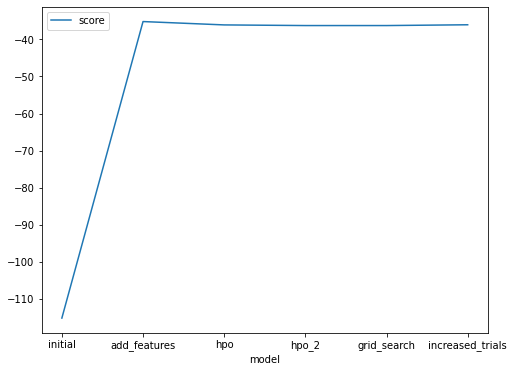

In [44]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)

fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo","hpo_2","grid_search","increased_trials"],
        "score": [-115.137560,-35.186484, -36.091199, -36.263891, -36.264821,  -36.0522]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

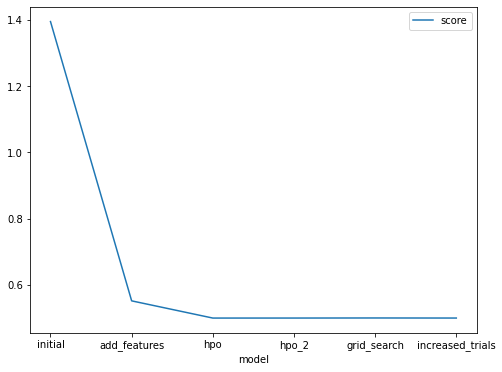

In [45]:
# Take the 3 kaggle scores and creating a line plot to show improvement

fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo","hpo_2","grid_search","increased_trials"],
        "score": [1.39487,0.55149, 0.49953, 0.49958,0.49982,  0.49960]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [47]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo","hpo_2","grid_search","increased_trials"],
   "num_bag_folds": [10, 10, 10,5,5,5],
    "num_trials":[1,1,5,5,5,10],
    "num_bag_sets": [0, 0, 0,2,2,2],
    "max_stack_levels": [3, 3, 3,1,1,1],
    "score": [1.39487,0.55149, 0.49953,0.49958,0.49982,0.49960]
})

,model,num_bag_folds,num_trials,num_bag_sets,max_stack_levels,score
0,initial,10,1,0,3,1.39487
1,add_features,10,1,0,3,0.55149
2,hpo,10,5,0,3,0.49953
3,hpo_2,5,5,2,1,0.49958
4,grid_search,5,5,2,1,0.49982
5,increased_trials,5,10,2,1,0.49960
